In [229]:

import io
import pandas as pd
import numpy as np

# save composite sentiment analysis results as csv
vaccine_data_sentiments = pd.read_csv('covidvaccinesentiments.csv')
# read in csv data that was already uploaded, and then convert to string

C:\Users\tabit\AppData\Local\Temp\ipykernel_32988\589810287.py:6: DtypeWarning: Columns (0,3,5,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  vaccine_data_sentiments = pd.read_csv('covidvaccinesentiments.csv')


In [230]:
import sys
!{sys.executable} -m pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt

You should consider upgrading via the 'c:\Users\tabit\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [231]:

vaccine_data_sentiments['created_at'] = pd.to_datetime(vaccine_data_sentiments['created_at'], errors='coerce')
vaccine_data_sentiments = vaccine_data_sentiments.dropna(subset=['created_at'])

KeyboardInterrupt: 

In [ ]:
def modify(x):
    try:
        return x.count("text")
    except:
        return 0

vaccine_data_sentiments['hashtags_count'] = vaccine_data_sentiments['hashtags'].apply(lambda x: modify(x))

In [ ]:
vaccine_data_retweets = vaccine_data_sentiments.copy()
vaccine_data_retweets.head()

,Unnamed: 0,created_at,full_text,user_followers,user_location,retweets,favorites,hashtags,Negative,Neutral,Positive,Overall,Polarity
0,0,2020-07-15 04:52:52+00:00,RT @AP: BREAKING: The first vaccine tested in ...,480,3rd rock from the sun,12232,0.0,[],0.0,0.711,0.289,0.7430,positive
1,1,2020-07-15 05:43:08+00:00,#MRNA\n\nStock futures are up today on more en...,4072,Birmingham UK,1,7.0,"[{'text': 'MRNA', 'indices': [0, 5]}, {'text':...",0.0,0.812,0.188,0.5709,positive
2,2,2020-07-15 08:49:37+00:00,RT @Vijayabaskarofl: BCG vaccine shall be admi...,73,NaN,293,0.0,[],0.0,1.000,0.0,0.0000,neutral
3,3,2020-07-15 12:00:53+00:00,RT @channelstv: COVID-19 Vaccine Is Tested And...,216,"Abuja, Nigeria",281,0.0,[],0.0,0.805,0.195,0.4404,positive
4,4,2020-07-15 11:10:13+00:00,Risk appetite continuing its rebound midway th...,2182,NaN,0,2.0,[],0.045,0.723,0.232,0.8316,positive


In [ ]:

# drop rows with NA values from retweets column
vaccine_data_retweets = vaccine_data_retweets.dropna(subset=['retweets'])
# keep rows with non-zero entries in retweets column
vaccine_data_retweets = vaccine_data_retweets[vaccine_data_retweets.retweets != "[]"]
vaccine_data_retweets = vaccine_data_retweets[vaccine_data_retweets.retweets.astype(int) != 0]
vaccine_data_retweets.retweets = vaccine_data_retweets.retweets.astype(int)

In [ ]:

vaccine_data_retweets = vaccine_data_retweets[vaccine_data_retweets["Overall"] != 0]

In [ ]:

!{sys.executable} -m pip install seaborn
import seaborn as sns

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)


You should consider upgrading via the 'c:\Users\tabit\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
vaccine_data_sentiments['weekly_polarity'] = vaccine_data_sentiments["Overall"].rolling(7).mean()

In [ ]:
vaccine_data_sentiments_monthly = vaccine_data_sentiments.copy()
vaccine_data_sentiments_monthly = vaccine_data_sentiments_monthly.groupby(pd.PeriodIndex(vaccine_data_sentiments_monthly['created_at'], freq="M"))['Overall'].mean().reset_index()

vaccine_data_sentiments_monthly['created_at'] = pd.to_datetime(pd.DataFrame({'day': 1, 
                                              'month': vaccine_data_sentiments_monthly['created_at'].dt.month, 
                                              'year': vaccine_data_sentiments_monthly['created_at'].dt.year}))
vaccine_data_sentiments_monthly.head()

,created_at,Overall
0,2020-04-01,0.003608
1,2020-05-01,-0.004887
2,2020-06-01,-0.014632
3,2020-07-01,0.069205
4,2020-08-01,0.026518


[Text(0.5, 1.0, 'Polarity over time, All-Time'),
 Text(0, 0.5, 'Polarity'),
 Text(0.5, 0, 'Date')]

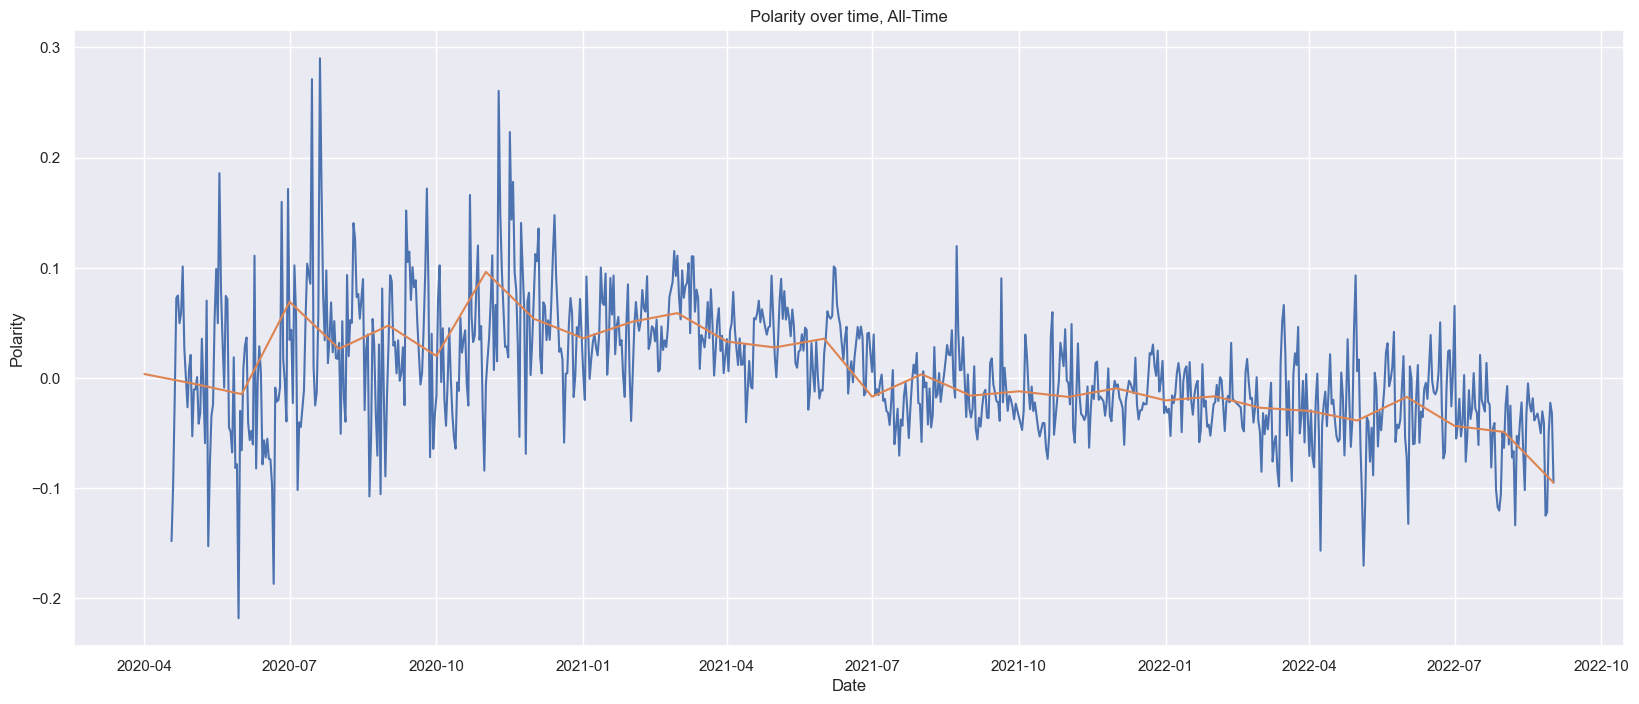

In [ ]:

vaccine_polarity = sns.lineplot(data=vaccine_data_sentiments, x=vaccine_data_sentiments['created_at'].dt.date, y='Overall', errorbar=None)
sns.lineplot(data=vaccine_data_sentiments_monthly, x='created_at', y='Overall', errorbar=None)
vaccine_polarity.set(title="Polarity over time, All-Time", ylabel="Polarity", xlabel="Date")

[Text(0.5, 1.0, '2020 Polarity over time'),
 Text(0, 0.5, 'Polarity'),
 Text(0.5, 0, 'Date')]

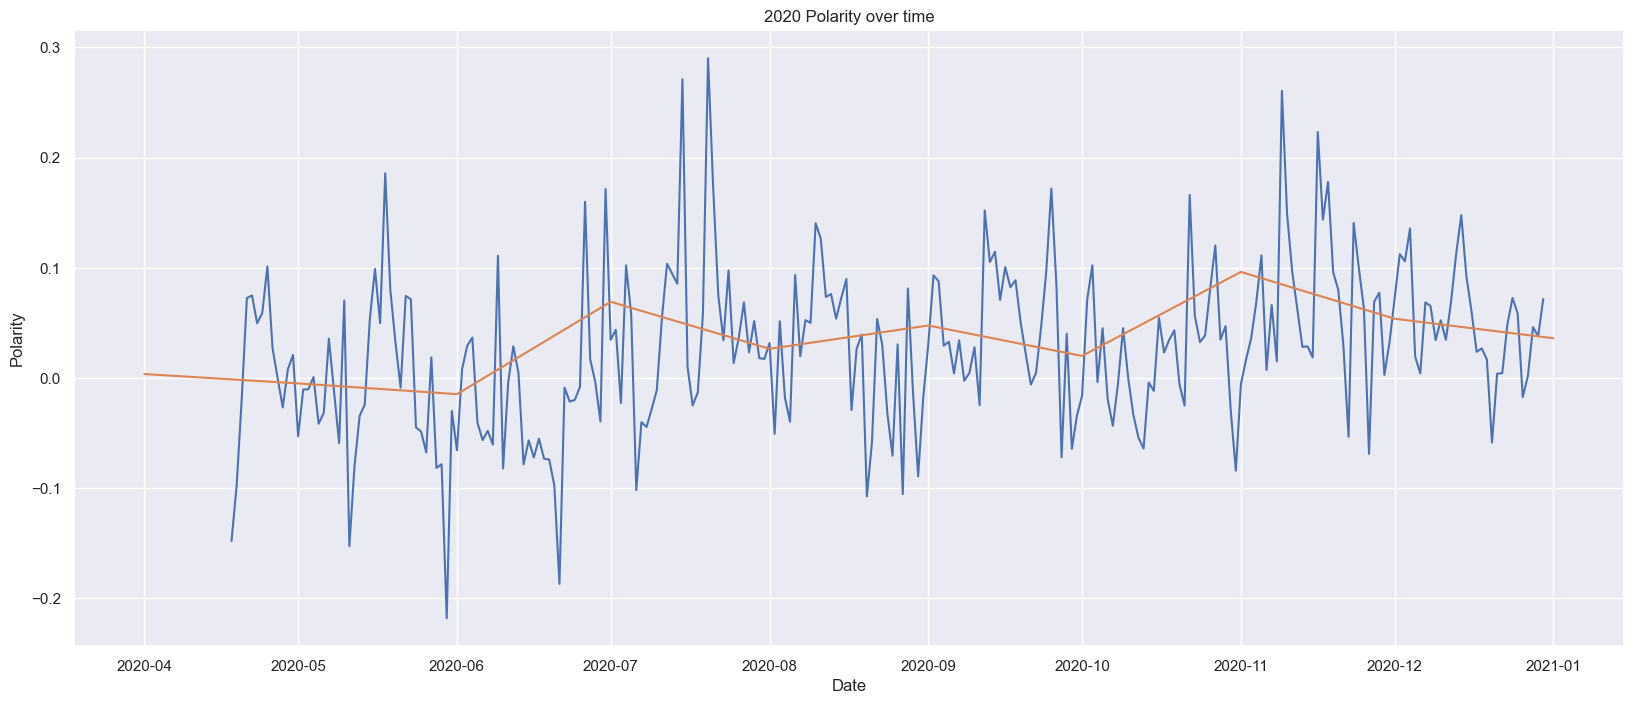

In [ ]:

vaccine_polarity_2020 = sns.lineplot(data=vaccine_data_sentiments[vaccine_data_sentiments.created_at < "2020-12-31"], x=vaccine_data_sentiments['created_at'].dt.date, y='Overall', errorbar=None)
sns.lineplot(data=vaccine_data_sentiments_monthly[vaccine_data_sentiments_monthly.created_at <= "2021-01-01"], x='created_at', y='Overall', errorbar=None)
vaccine_polarity_2020.set(title="2020 Polarity over time", ylabel="Polarity", xlabel="Date")

[Text(0.5, 1.0, '2021 Polarity over time'),
 Text(0, 0.5, 'Polarity'),
 Text(0.5, 0, 'Date')]

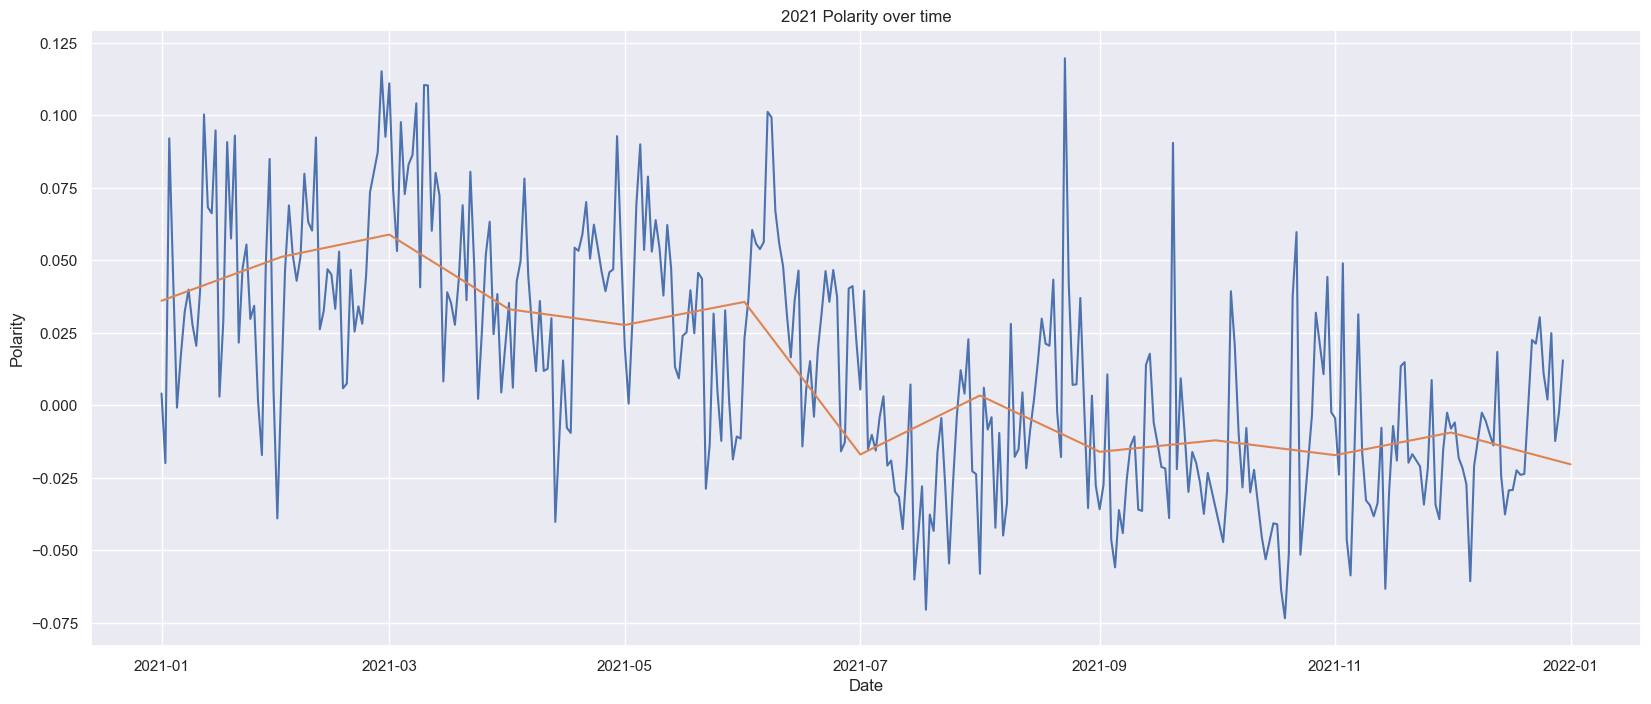

In [ ]:

vaccine_polarity_2021 = sns.lineplot(data=vaccine_data_sentiments[(vaccine_data_sentiments.created_at < "2021-12-31") & (vaccine_data_sentiments.created_at > "2021-01-01")], x=vaccine_data_sentiments['created_at'].dt.date, y='Overall', errorbar=None)
sns.lineplot(data=vaccine_data_sentiments_monthly[(vaccine_data_sentiments_monthly.created_at <= "2022-01-01") & (vaccine_data_sentiments_monthly.created_at >= "2021-01-01")], x='created_at', y='Overall', errorbar=None)
vaccine_polarity_2021.set(title="2021 Polarity over time", ylabel="Polarity", xlabel="Date")

[Text(0.5, 1.0, '2022 Polarity over time'),
 Text(0, 0.5, 'Polarity'),
 Text(0.5, 0, 'Date')]

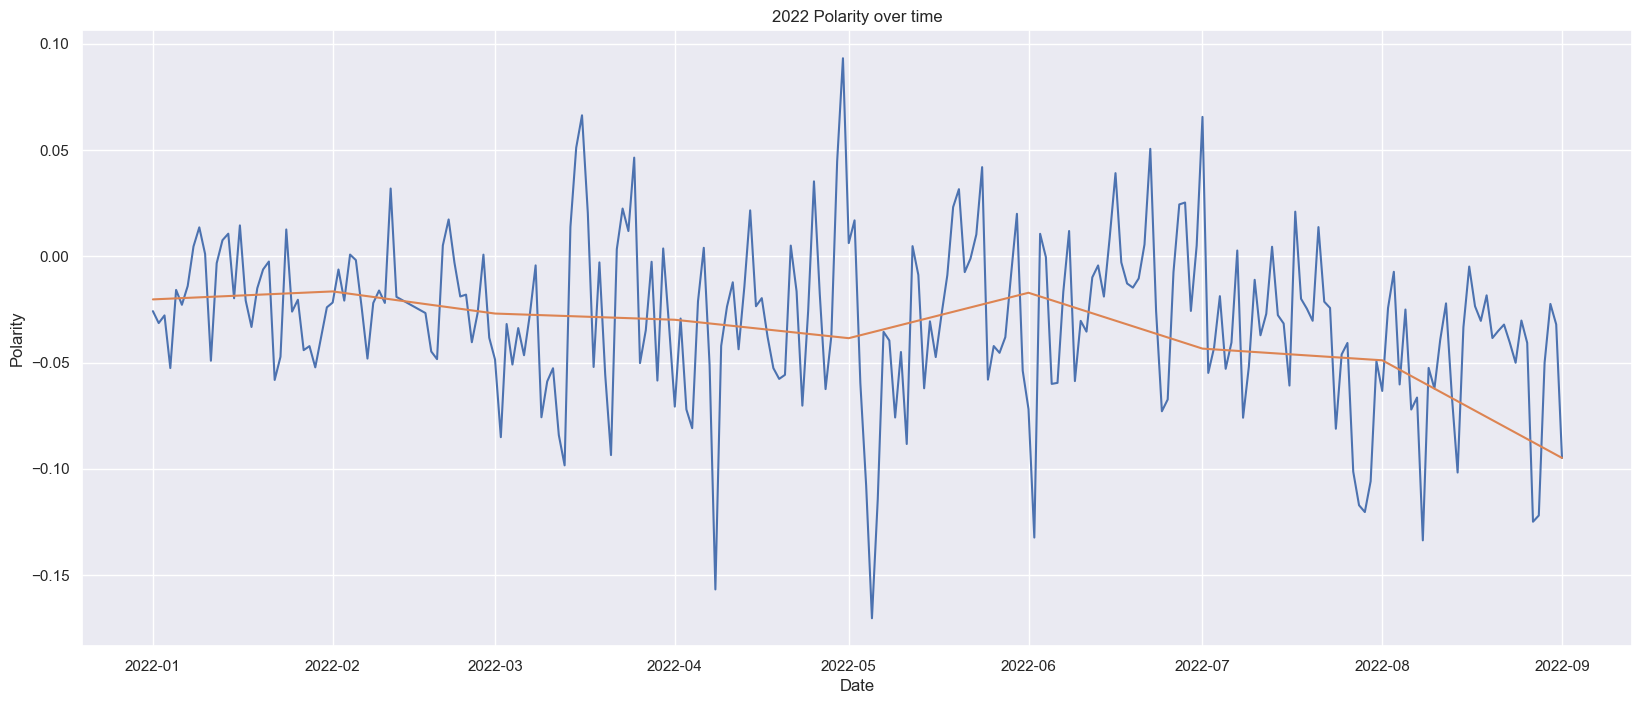

In [ ]:

vaccine_polarity_2022 = sns.lineplot(data=vaccine_data_sentiments[(vaccine_data_sentiments.created_at < "2022-12-31") & (vaccine_data_sentiments.created_at > "2022-01-01")], x=vaccine_data_sentiments['created_at'].dt.date, y='Overall', errorbar=None)
sns.lineplot(data=vaccine_data_sentiments_monthly[(vaccine_data_sentiments_monthly.created_at <= "2023-01-01") & (vaccine_data_sentiments_monthly.created_at >= "2022-01-01")], x='created_at', y='Overall', errorbar=None)
vaccine_polarity_2022.set(title="2022 Polarity over time", ylabel="Polarity", xlabel="Date")

In [ ]:
palette = {
    'positive': 'tab:green',
    'neutral': 'tab:orange',
    'negative': 'tab:red',
}

[Text(0.5, 1.0, 'Retweets vs. Polarity, All time'),
 Text(0, 0.5, 'Polarity'),
 Text(0.5, 0, 'Retweet Count')]

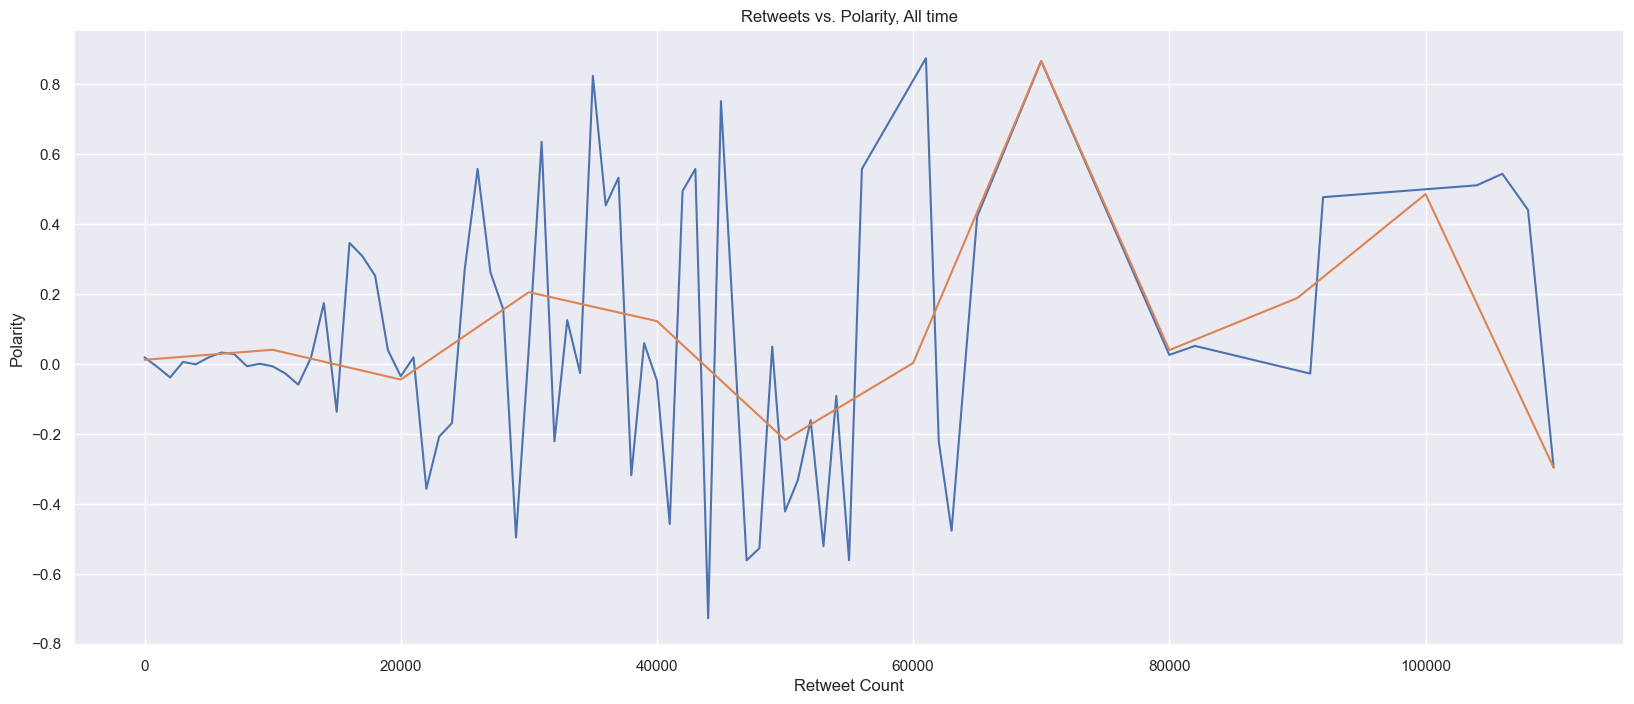

In [ ]:
vaccine_data_retweets_avg = vaccine_data_retweets.copy()
vaccine_data_retweets_avg['binned'] = pd.cut(vaccine_data_retweets_avg['retweets'], bins=list(range(0, 150000, 1000))).map(lambda x: x.left)
vaccine_data_retweets_avg['binned_2'] = pd.cut(vaccine_data_retweets['retweets'], bins=list(range(0, 150000, 10000))).map(lambda x: x.left)

overall_retweets = sns.lineplot(data=vaccine_data_retweets_avg.groupby('binned')['Overall'].mean().reset_index(), x="binned", y="Overall")
overall_retweets = sns.lineplot(data=vaccine_data_retweets_avg.groupby('binned_2')['Overall'].mean().reset_index(), x="binned_2", y="Overall")
overall_retweets.set(title="Retweets vs. Polarity, All time", ylabel="Polarity", xlabel="Retweet Count")


In [ ]:
vaccine_data_sentiments_monthly = vaccine_data_sentiments.copy()
vaccine_data_sentiments_monthly = vaccine_data_sentiments_monthly.groupby(pd.PeriodIndex(vaccine_data_sentiments_monthly['created_at'], freq="M"))['Overall'].mean().reset_index()

vaccine_data_sentiments_monthly['created_at'] = pd.to_datetime(pd.DataFrame({'day': 1, 
                                              'month': vaccine_data_sentiments_monthly['created_at'].dt.month, 
                                              'year': vaccine_data_sentiments_monthly['created_at'].dt.year}))
vaccine_data_sentiments_monthly.head()

,created_at,Overall
0,2020-04-01,0.003608
1,2020-05-01,-0.004887
2,2020-06-01,-0.014632
3,2020-07-01,0.069205
4,2020-08-01,0.026518


C:\Users\tabit\AppData\Local\Temp\ipykernel_32988\3472576102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_data_retweets_2020['binned'] = pd.cut(vaccine_data_retweets_2020['retweets'], bins=list(range(0, 150000, 1000))).map(lambda x: x.left)
C:\Users\tabit\AppData\Local\Temp\ipykernel_32988\3472576102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_data_retweets_2020['binned_2'] = pd.cut(vaccine_data_retweets_2020['retweets'], bins=list(range(0, 150000, 10000))).map(lambda x: x.lef

[Text(0.5, 1.0, '2020 Retweets vs. Polarity'),
 Text(0, 0.5, 'Polarity'),
 Text(0.5, 0, 'Retweet Count')]

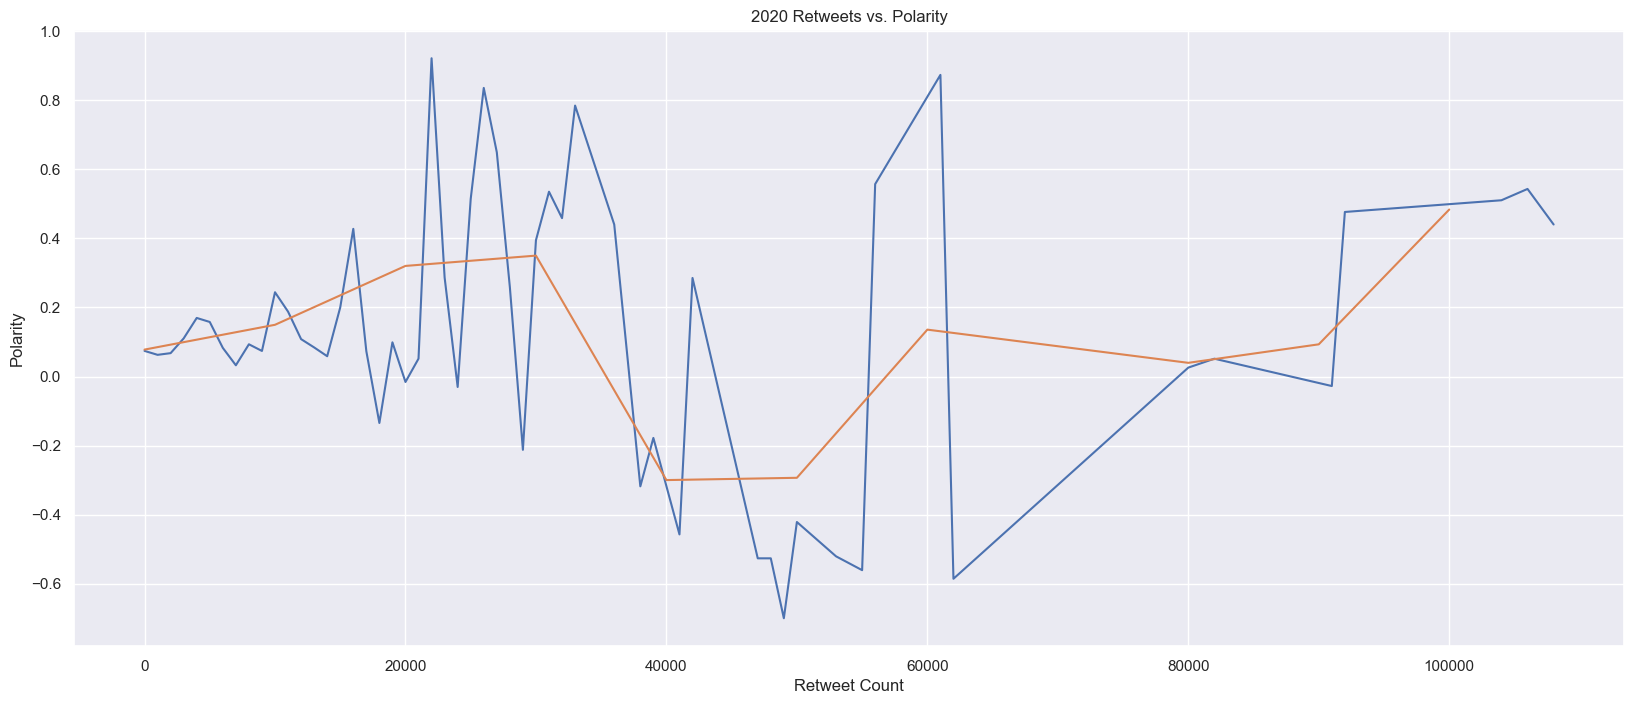

In [232]:
vaccine_data_retweets_2020 = vaccine_data_retweets[vaccine_data_retweets.created_at < "2020-12-31"]

vaccine_data_retweets_2020['binned'] = pd.cut(vaccine_data_retweets_2020['retweets'], bins=list(range(0, 150000, 1000))).map(lambda x: x.left)
vaccine_data_retweets_2020['binned_2'] = pd.cut(vaccine_data_retweets_2020['retweets'], bins=list(range(0, 150000, 10000))).map(lambda x: x.left)

retweets_2020 = sns.lineplot(data=vaccine_data_retweets_2020.groupby('binned')['Overall'].mean().reset_index(), x="binned", y="Overall")
retweets_2020 = sns.lineplot(data=vaccine_data_retweets_2020.groupby('binned_2')['Overall'].mean().reset_index(), x="binned_2", y="Overall")
retweets_2020.set(title="2020 Retweets vs. Polarity", ylabel="Polarity", xlabel="Retweet Count")

C:\Users\tabit\AppData\Local\Temp\ipykernel_32988\987454941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_data_retweets_2021['binned'] = pd.cut(vaccine_data_retweets_2021['retweets'], bins=list(range(0, 150000, 1000))).map(lambda x: x.left)
C:\Users\tabit\AppData\Local\Temp\ipykernel_32988\987454941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_data_retweets_2021['binned_2'] = pd.cut(vaccine_data_retweets_2021['retweets'], bins=list(range(0, 150000, 10000))).map(lambda x: x.left)

[Text(0.5, 1.0, '2021 Retweets vs. Polarity'),
 Text(0, 0.5, 'Polarity'),
 Text(0.5, 0, 'Retweet Count')]

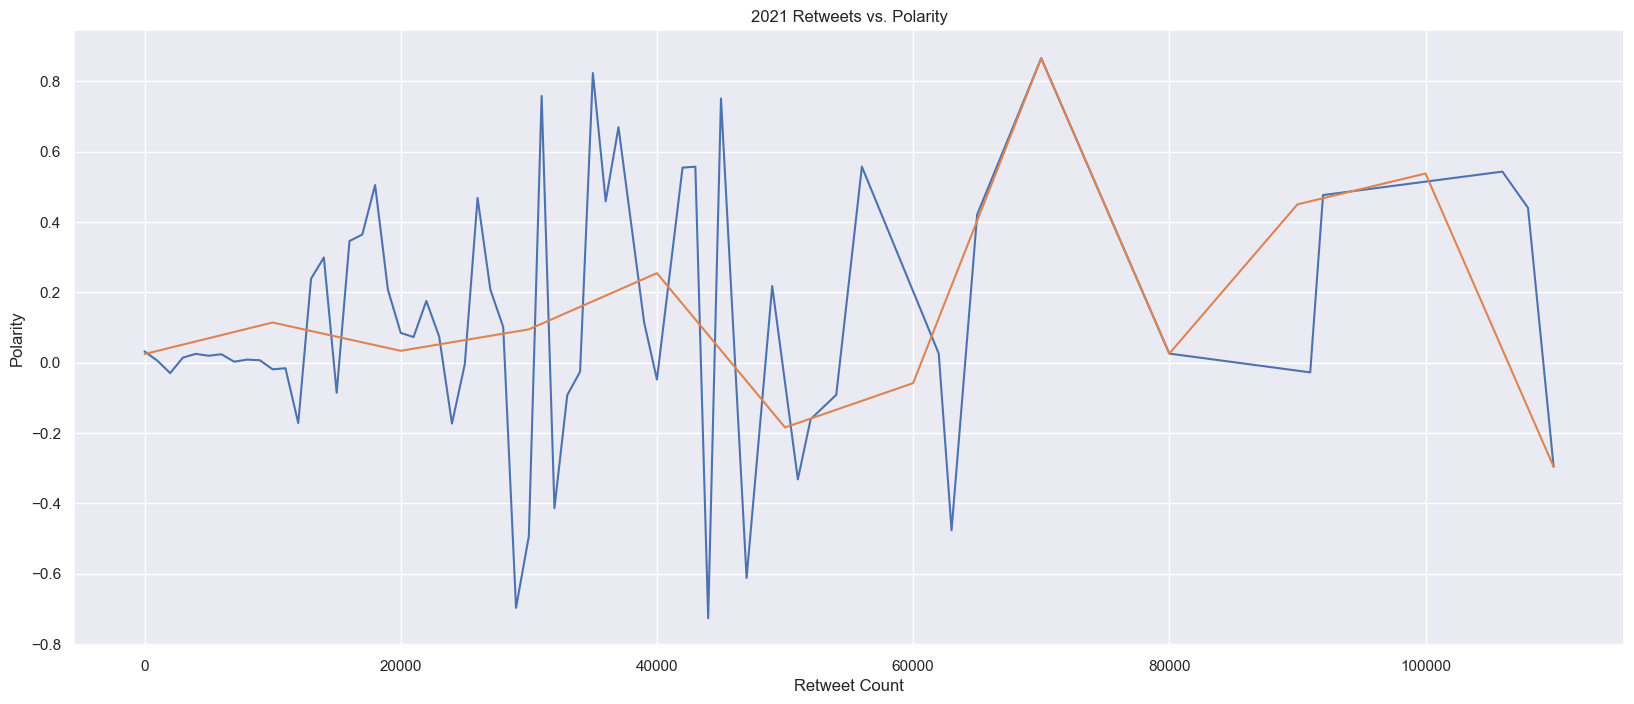

In [234]:
vaccine_data_retweets_2021 = vaccine_data_retweets[(vaccine_data_retweets.created_at > "2021-01-01") & (vaccine_data_retweets.created_at < "2021-12-31")]

vaccine_data_retweets_2021['binned'] = pd.cut(vaccine_data_retweets_2021['retweets'], bins=list(range(0, 150000, 1000))).map(lambda x: x.left)
vaccine_data_retweets_2021['binned_2'] = pd.cut(vaccine_data_retweets_2021['retweets'], bins=list(range(0, 150000, 10000))).map(lambda x: x.left)

retweets_2021 = sns.lineplot(data=vaccine_data_retweets_2021.groupby('binned')['Overall'].mean().reset_index(), x="binned", y="Overall")
retweets_2021 = sns.lineplot(data=vaccine_data_retweets_2021.groupby('binned_2')['Overall'].mean().reset_index(), x="binned_2", y="Overall")
retweets_2021.set(title="2021 Retweets vs. Polarity", ylabel="Polarity", xlabel="Retweet Count")


C:\Users\tabit\AppData\Local\Temp\ipykernel_32988\2532533659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_data_retweets_2022['binned'] = pd.cut(vaccine_data_retweets_2022['retweets'], bins=list(range(0, 150000, 1000))).map(lambda x: x.left)
C:\Users\tabit\AppData\Local\Temp\ipykernel_32988\2532533659.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_data_retweets_2022['binned_2'] = pd.cut(vaccine_data_retweets_2022['retweets'], bins=list(range(0, 150000, 10000))).map(lambda x: x.lef

[Text(0.5, 1.0, '2022 Retweets vs. Polarity'),
 Text(0, 0.5, 'Polarity'),
 Text(0.5, 0, 'Retweet Count')]

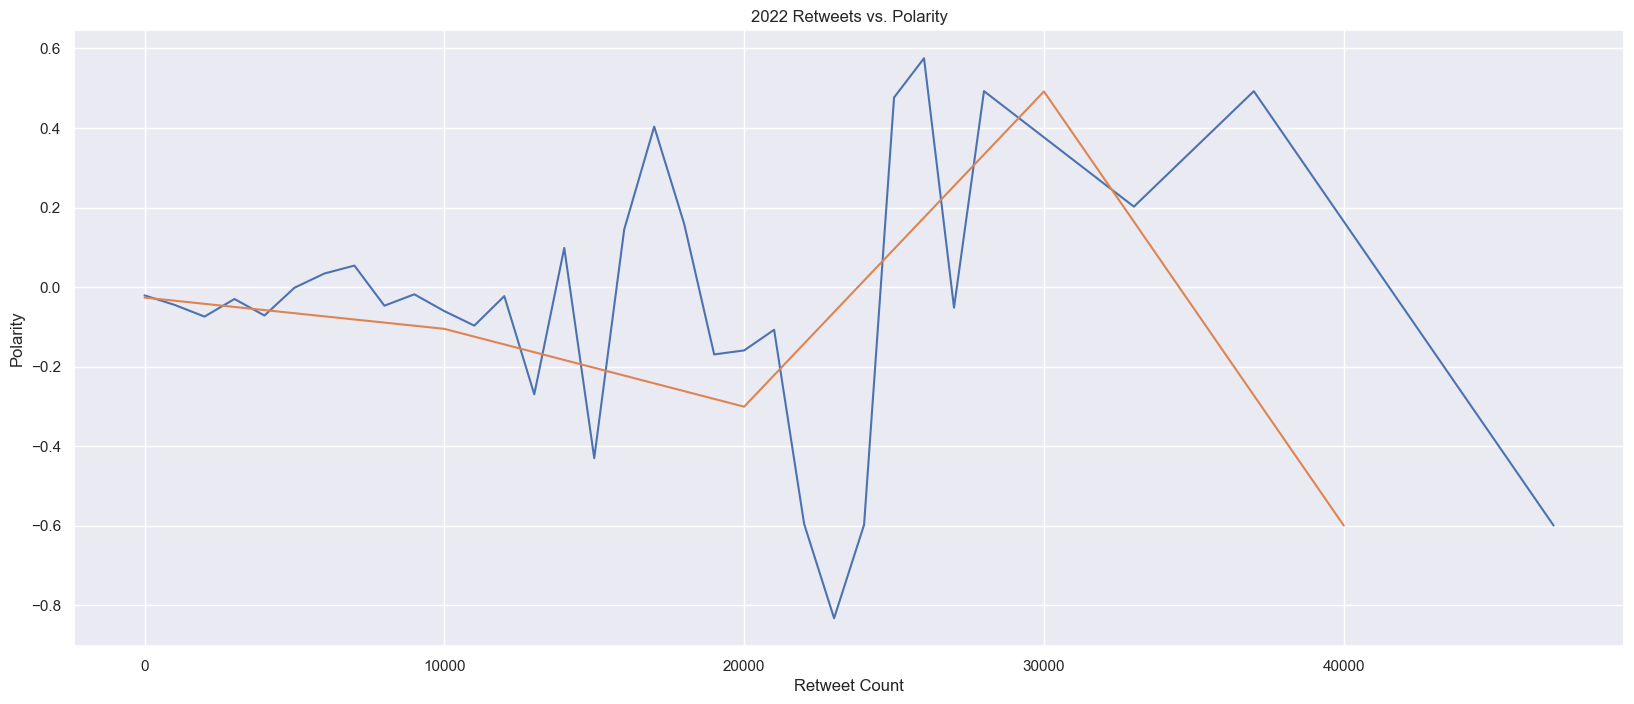

In [236]:
vaccine_data_retweets_2022 = vaccine_data_retweets[(vaccine_data_retweets.created_at > "2022-01-01") & (vaccine_data_retweets.created_at < "2022-12-31")]

vaccine_data_retweets_2022['binned'] = pd.cut(vaccine_data_retweets_2022['retweets'], bins=list(range(0, 150000, 1000))).map(lambda x: x.left)
vaccine_data_retweets_2022['binned_2'] = pd.cut(vaccine_data_retweets_2022['retweets'], bins=list(range(0, 150000, 10000))).map(lambda x: x.left)

retweets_2022 = sns.lineplot(data=vaccine_data_retweets_2022.groupby('binned')['Overall'].mean().reset_index(), x="binned", y="Overall")
retweets_2022 = sns.lineplot(data=vaccine_data_retweets_2022.groupby('binned_2')['Overall'].mean().reset_index(), x="binned_2", y="Overall")
retweets_2022.set(title="2022 Retweets vs. Polarity", ylabel="Polarity", xlabel="Retweet Count")

In [197]:

vaccine_data_favorites = vaccine_data_sentiments.copy()
# drop rows with NA values from retweets column
vaccine_data_favorites = vaccine_data_favorites.dropna(subset=['favorites'])
# keep rows with non-zero entries in retweets column
vaccine_data_favorites = vaccine_data_favorites[vaccine_data_favorites.favorites != "[]"]
vaccine_data_favorites = vaccine_data_favorites[vaccine_data_favorites.favorites.astype(int) != 0]
vaccine_data_favorites.favorites = vaccine_data_favorites.favorites.astype(int)

[Text(0.5, 1.0, 'Favorites vs. Polarity, All time'),
 Text(0, 0.5, 'Polarity'),
 Text(0.5, 0, 'Favorites Count')]

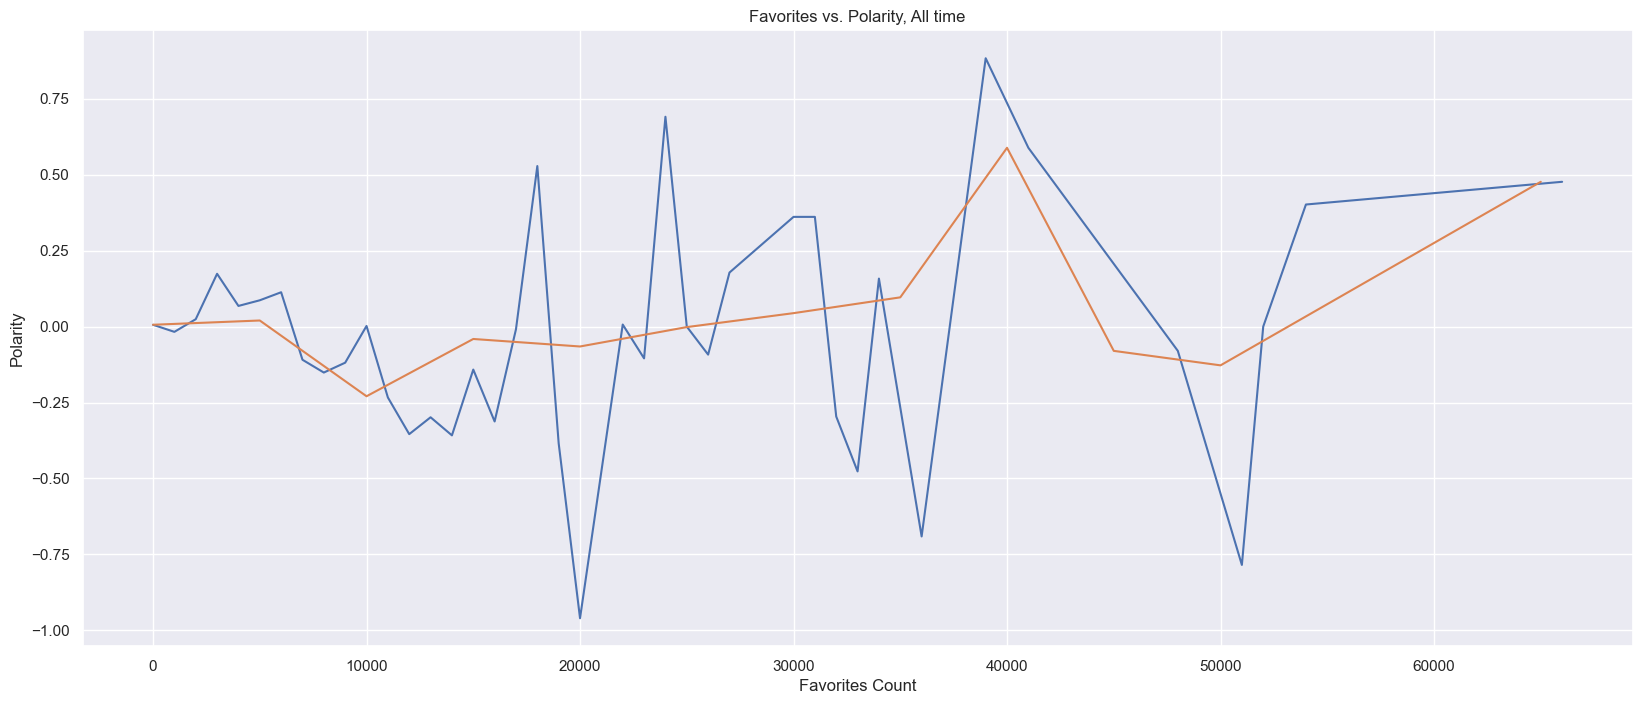

In [249]:
vaccine_data_favorites_avg = vaccine_data_favorites.copy()

vaccine_data_favorites_avg['binned'] = pd.cut(vaccine_data_favorites['favorites'], bins=list(range(0, 80000, 1000))).map(lambda x: x.left)
vaccine_data_favorites_avg['binned_2'] = pd.cut(vaccine_data_favorites['favorites'], bins=list(range(0, 80000, 5000))).map(lambda x: x.left)

overall_favorites = sns.lineplot(data=vaccine_data_favorites_avg.groupby('binned')['Overall'].mean().reset_index(), x="binned", y="Overall")
overall_favorites = sns.lineplot(data=vaccine_data_favorites_avg.groupby('binned_2')['Overall'].mean().reset_index(), x="binned_2", y="Overall")
overall_favorites.set(title="Favorites vs. Polarity, All time", ylabel="Polarity", xlabel="Favorites Count")


C:\Users\tabit\AppData\Local\Temp\ipykernel_32988\2523727430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_data_favorites_avg_2020['binned'] = pd.cut(vaccine_data_favorites_avg_2020['favorites'], bins=list(range(0, 80000, 1000))).map(lambda x: x.left)
C:\Users\tabit\AppData\Local\Temp\ipykernel_32988\2523727430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_data_favorites_avg_2020['binned_2'] = pd.cut(vaccine_data_favorites_avg_2020['favorites'], bins=list(range(0, 80000, 5000))).

[Text(0.5, 1.0, '2020 Favorites vs. Polarity'),
 Text(0, 0.5, 'Polarity'),
 Text(0.5, 0, 'Favorites Count')]

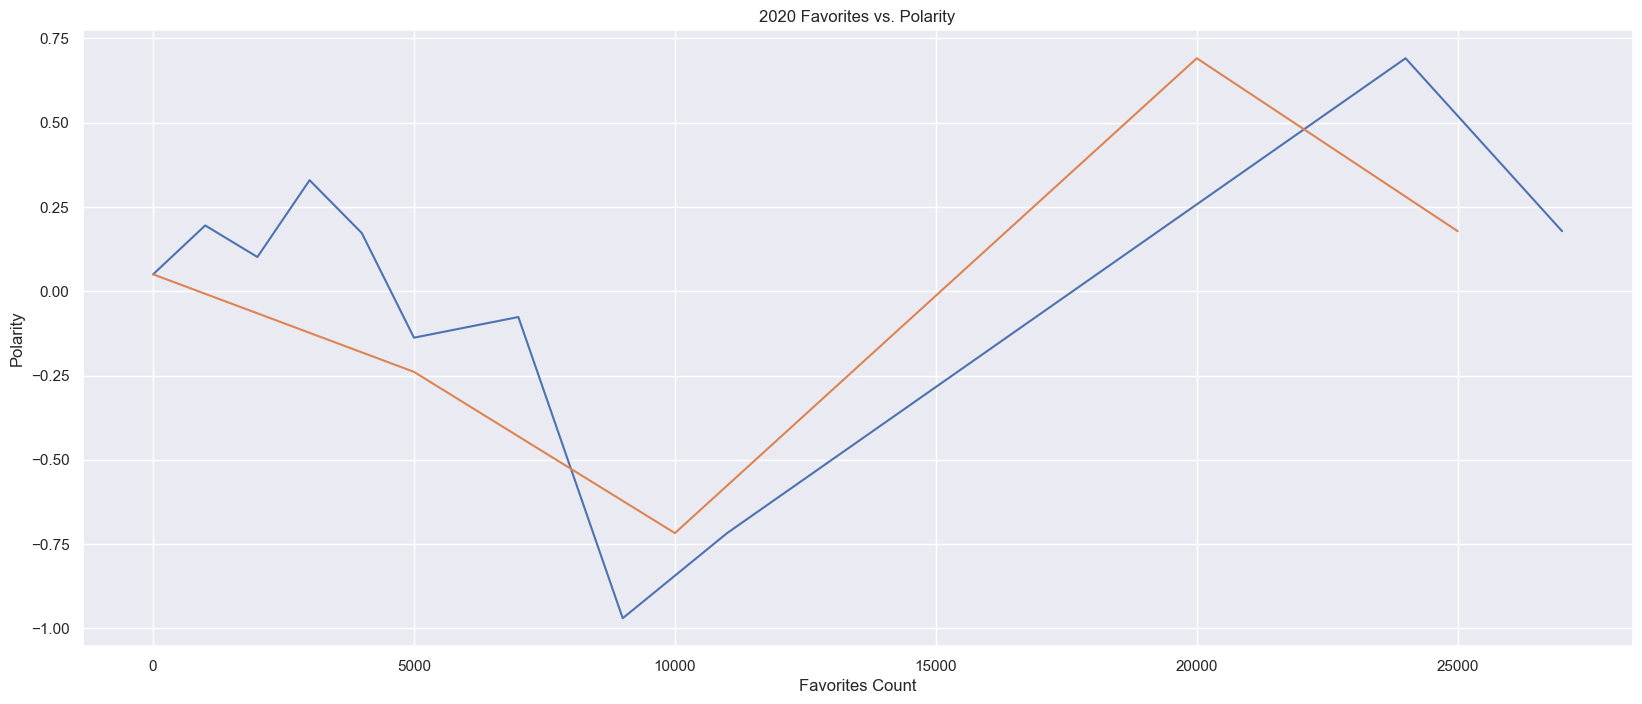

In [248]:
vaccine_data_favorites_avg_2020 = vaccine_data_favorites[vaccine_data_favorites.created_at < "2020-12-31"]

vaccine_data_favorites_avg_2020['binned'] = pd.cut(vaccine_data_favorites_avg_2020['favorites'], bins=list(range(0, 80000, 1000))).map(lambda x: x.left)
vaccine_data_favorites_avg_2020['binned_2'] = pd.cut(vaccine_data_favorites_avg_2020['favorites'], bins=list(range(0, 80000, 5000))).map(lambda x: x.left)

favorites_2020 = sns.lineplot(data=vaccine_data_favorites_avg_2020.groupby('binned')['Overall'].mean().reset_index(), x="binned", y="Overall")
favorites_2020 = sns.lineplot(data=vaccine_data_favorites_avg_2020.groupby('binned_2')['Overall'].mean().reset_index(), x="binned_2", y="Overall")
favorites_2020.set(title="Favorites vs. Polarity, All time", ylabel="Polarity", xlabel="Favorites Count")
favorites_2020.set(title="2020 Favorites vs. Polarity", ylabel="Polarity", xlabel="Favorites Count")

C:\Users\tabit\AppData\Local\Temp\ipykernel_32988\803923906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_data_favorites_avg_2021['binned'] = pd.cut(vaccine_data_favorites_avg_2021['favorites'], bins=list(range(0, 80000, 1000))).map(lambda x: x.left)
C:\Users\tabit\AppData\Local\Temp\ipykernel_32988\803923906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_data_favorites_avg_2021['binned_2'] = pd.cut(vaccine_data_favorites_avg_2021['favorites'], bins=list(range(0, 80000, 5000))).ma

[Text(0.5, 1.0, '2021 Favorites vs. Polarity'),
 Text(0, 0.5, 'Polarity'),
 Text(0.5, 0, 'Favorites Count')]

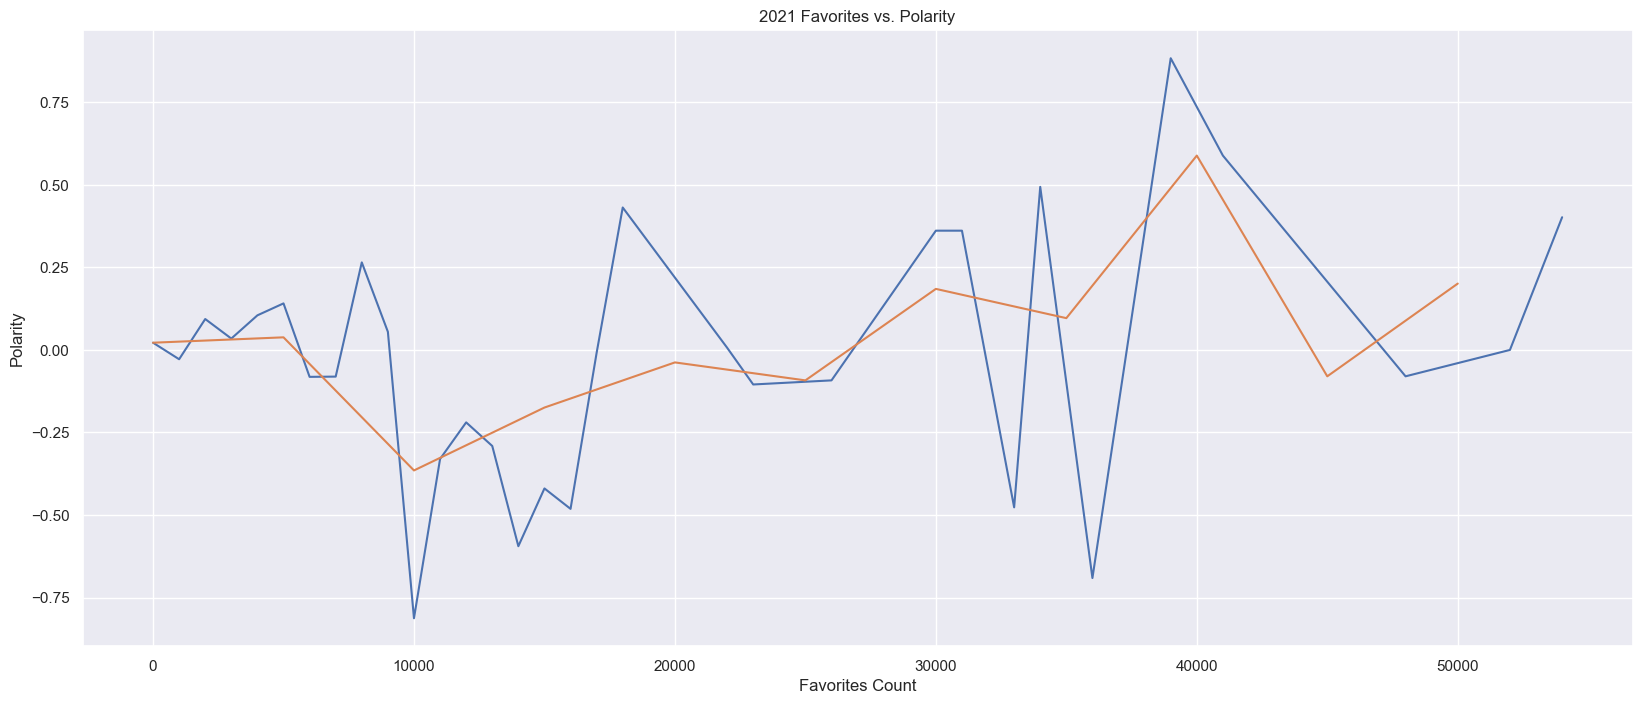

In [250]:
vaccine_data_favorites_avg_2021 = vaccine_data_favorites[(vaccine_data_favorites.created_at > "2021-01-01") & (vaccine_data_favorites.created_at < "2021-12-31")]

vaccine_data_favorites_avg_2021['binned'] = pd.cut(vaccine_data_favorites_avg_2021['favorites'], bins=list(range(0, 80000, 1000))).map(lambda x: x.left)
vaccine_data_favorites_avg_2021['binned_2'] = pd.cut(vaccine_data_favorites_avg_2021['favorites'], bins=list(range(0, 80000, 5000))).map(lambda x: x.left)

favorites_2021 = sns.lineplot(data=vaccine_data_favorites_avg_2021.groupby('binned')['Overall'].mean().reset_index(), x="binned", y="Overall")
favorites_2021 = sns.lineplot(data=vaccine_data_favorites_avg_2021.groupby('binned_2')['Overall'].mean().reset_index(), x="binned_2", y="Overall")
favorites_2021.set(title="2021 Favorites vs. Polarity", ylabel="Polarity", xlabel="Favorites Count")


C:\Users\tabit\AppData\Local\Temp\ipykernel_32988\556786362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_data_favorites_avg_2022['binned'] = pd.cut(vaccine_data_favorites_avg_2022['favorites'], bins=list(range(0, 80000, 1000))).map(lambda x: x.left)
C:\Users\tabit\AppData\Local\Temp\ipykernel_32988\556786362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_data_favorites_avg_2022['binned_2'] = pd.cut(vaccine_data_favorites_avg_2022['favorites'], bins=list(range(0, 80000, 5000))).ma

[Text(0.5, 1.0, '2022 Favorites vs. Polarity'),
 Text(0, 0.5, 'Polarity'),
 Text(0.5, 0, 'Favorites Count')]

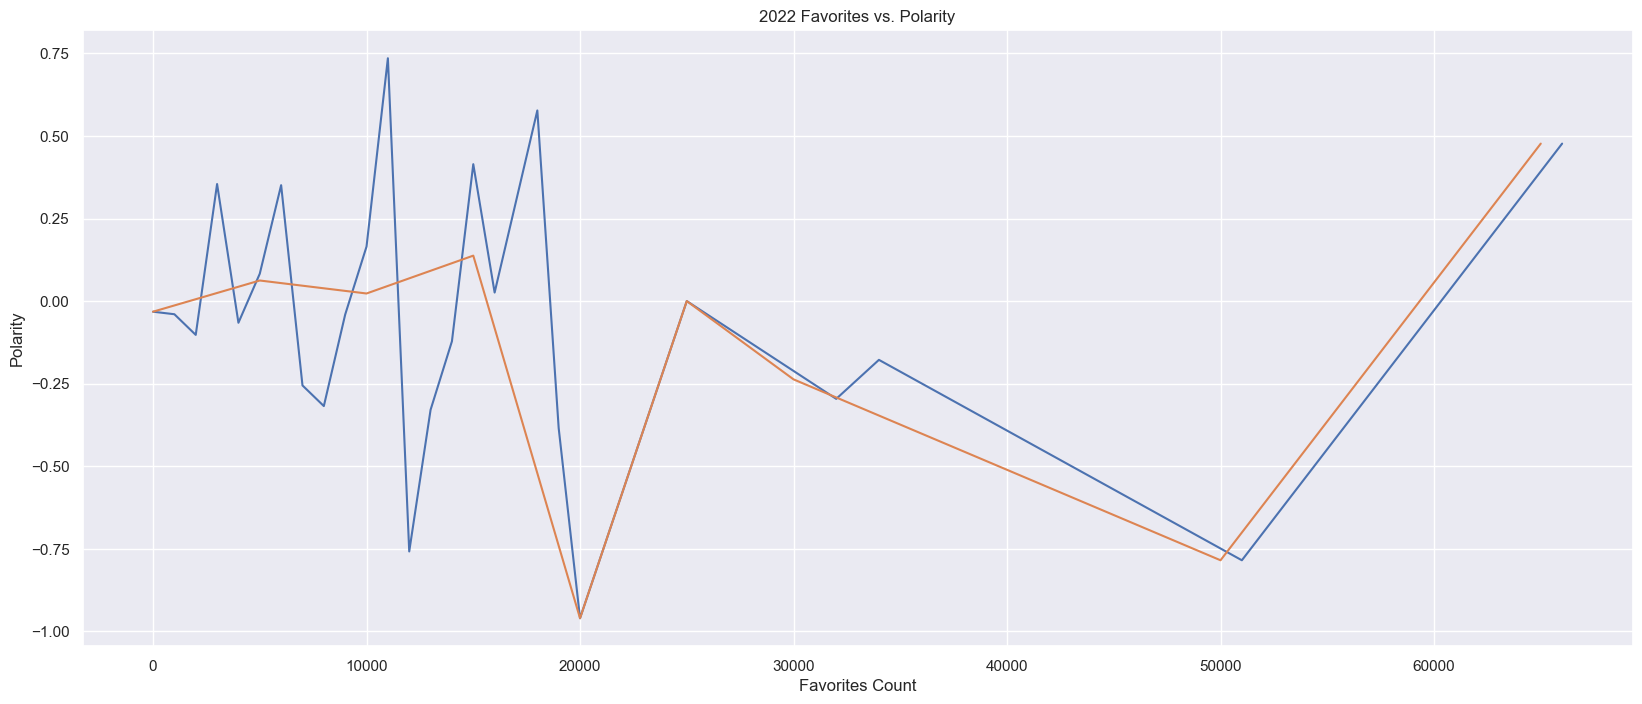

In [251]:
vaccine_data_favorites_avg_2022 = vaccine_data_favorites[(vaccine_data_favorites.created_at > "2022-01-01") & (vaccine_data_favorites.created_at < "2022-12-31")]

vaccine_data_favorites_avg_2022['binned'] = pd.cut(vaccine_data_favorites_avg_2022['favorites'], bins=list(range(0, 80000, 1000))).map(lambda x: x.left)
vaccine_data_favorites_avg_2022['binned_2'] = pd.cut(vaccine_data_favorites_avg_2022['favorites'], bins=list(range(0, 80000, 5000))).map(lambda x: x.left)

favorites_2022 = sns.lineplot(data=vaccine_data_favorites_avg_2022.groupby('binned')['Overall'].mean().reset_index(), x="binned", y="Overall")
favorites_2022 = sns.lineplot(data=vaccine_data_favorites_avg_2022.groupby('binned_2')['Overall'].mean().reset_index(), x="binned_2", y="Overall")
favorites_2022.set(title="2022 Favorites vs. Polarity", ylabel="Polarity", xlabel="Favorites Count")

[Text(0.5, 1.0, 'Average Hashtags vs. Polarity, All time'),
 Text(0, 0.5, 'Polarity'),
 Text(0.5, 0, 'Hashtags Count')]

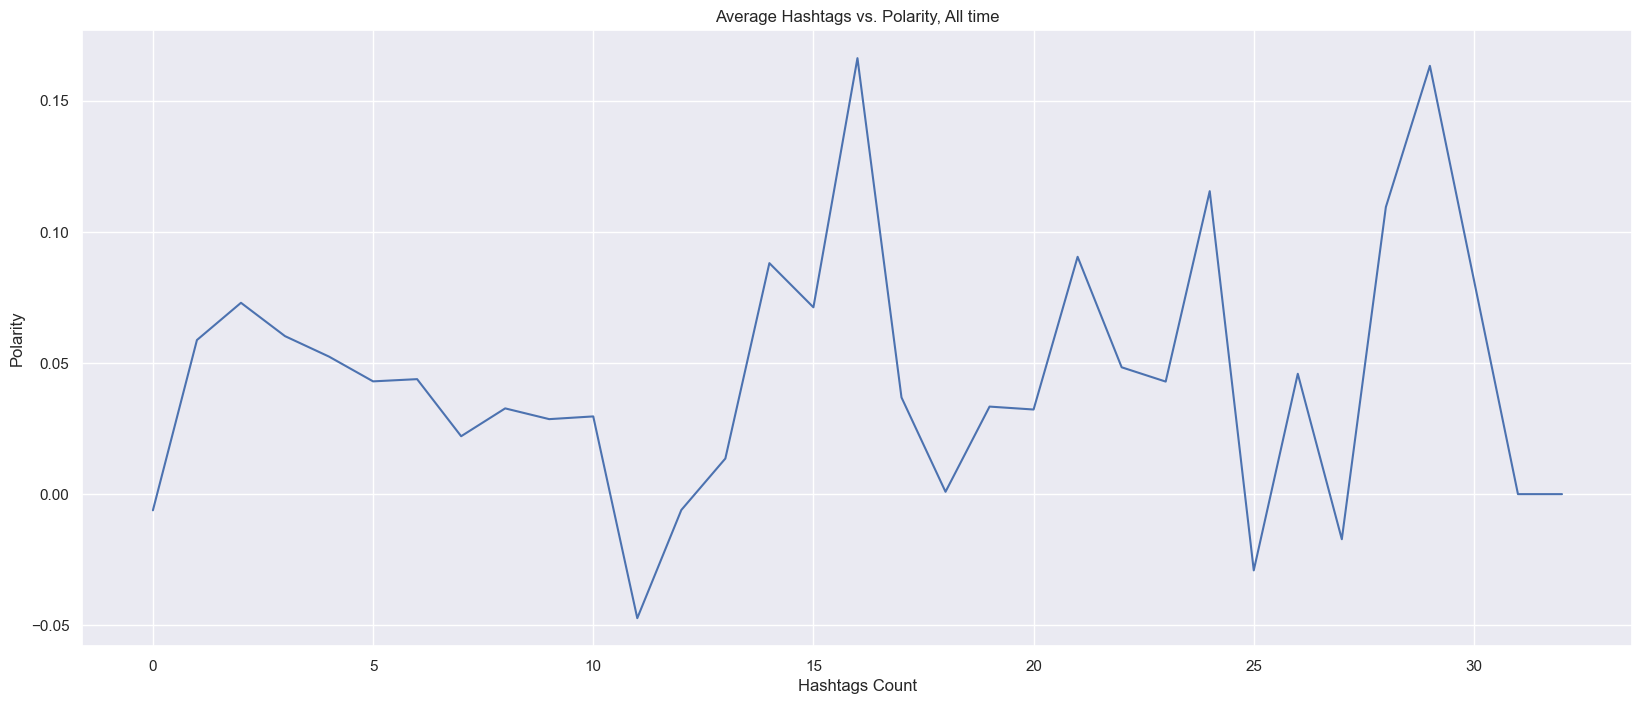

In [165]:

vaccine_data_hashtags = vaccine_data_sentiments.groupby("hashtags_count")['Overall'].mean().reset_index()
vaccine_data_hashtags.head()

overall_hashtags = sns.lineplot(data=vaccine_data_hashtags, x="hashtags_count", y="Overall")
overall_hashtags.set(title="Average Hashtags vs. Polarity, All time", ylabel="Polarity", xlabel="Hashtags Count")

In [174]:

vaccine_data_sentiments = vaccine_data_sentiments.dropna(subset=['user_followers'])

In [188]:
vaccine_data_sentiments.user_followers = vaccine_data_sentiments.user_followers.astype(int)

C:\Users\tabit\AppData\Local\Temp\ipykernel_32988\1948681478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_data_favorites_avg_2022['binned'] = pd.cut(vaccine_data_favorites_avg_2022['user_followers'], bins=list(range(0, 7500000, 500000))).map(lambda x: x.left)
C:\Users\tabit\AppData\Local\Temp\ipykernel_32988\1948681478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_data_favorites_avg_2022['binned_2'] = pd.cut(vaccine_data_favorites_avg_2022['user_followers'], bins=list(range(0, 7

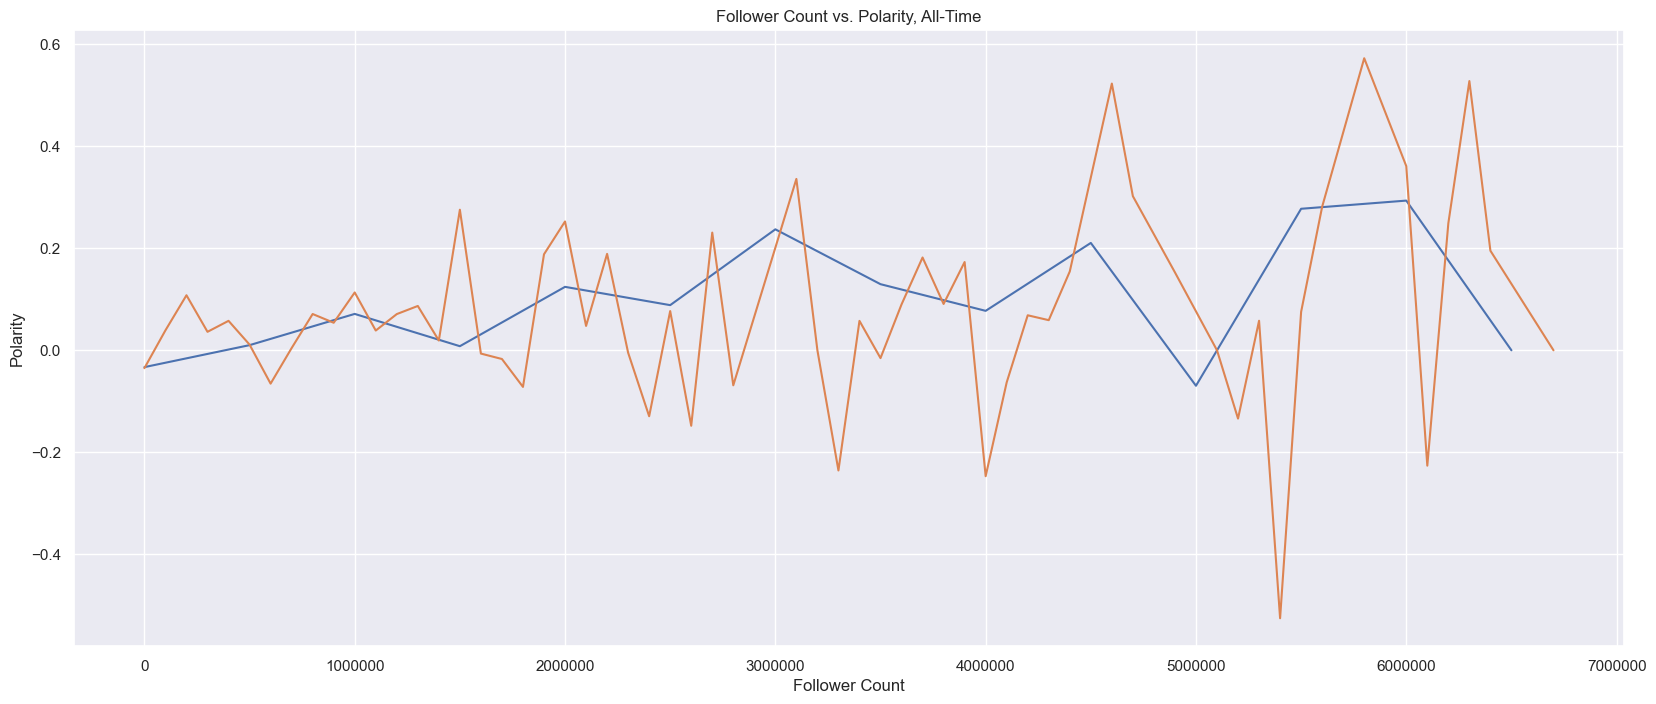

In [256]:

vaccine_data_favorites_avg_2022['binned'] = pd.cut(vaccine_data_favorites_avg_2022['user_followers'], bins=list(range(0, 7500000, 500000))).map(lambda x: x.left)
vaccine_data_favorites_avg_2022['binned_2'] = pd.cut(vaccine_data_favorites_avg_2022['user_followers'], bins=list(range(0, 7000000, 100000))).map(lambda x: x.left)

vaccine_followers_overall = sns.lineplot(data=vaccine_data_favorites_avg_2022.groupby('binned')['Overall'].mean().reset_index(), x="binned", y="Overall")
vaccine_followers_overall = sns.lineplot(data=vaccine_data_favorites_avg_2022.groupby('binned_2')['Overall'].mean().reset_index(), x="binned_2", y="Overall")

vaccine_followers_overall.set(title="Follower Count vs. Polarity, All-Time", ylabel="Polarity", xlabel="Follower Count")
vaccine_followers_overall.ticklabel_format(style="plain")